In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#if you want to ignore the red warning (not an error warning)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset

df = pd.read_csv('Titanic.csv')

In [3]:
#preview dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check missing value

missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column' : missing_values.index,
    'Missing Values' : missing_values.values,
    'Missing Percentage' : missing_percentages.values
})

print(missing_info)

         Column  Missing Values  Missing Percentage
0   PassengerId               0            0.000000
1      Survived               0            0.000000
2        Pclass               0            0.000000
3          Name               0            0.000000
4           Sex               0            0.000000
5           Age             177           19.865320
6         SibSp               0            0.000000
7         Parch               0            0.000000
8        Ticket               0            0.000000
9          Fare               0            0.000000
10        Cabin             687           77.104377
11     Embarked               2            0.224467


HANDLING THE MISSING VALUES

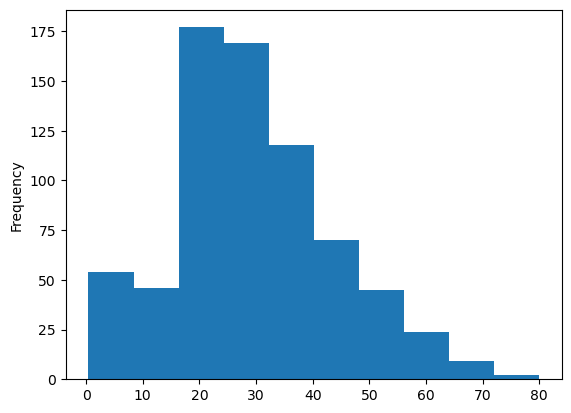

In [6]:
#show the visualization of Age column
df.Age.plot(kind='hist');

In [7]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

In [8]:
#show the proportion of data

df.shape[0]

891

In [9]:
#check value counts for categorical data

df.value_counts(['Cabin', 'Embarked'])

Cabin        Embarked
C23 C25 C27  S           4
G6           S           4
B96 B98      S           4
F33          S           3
F2           S           3
                        ..
B94          S           1
B86          C           1
B82 B84      C           1
B80          C           1
T            S           1
Name: count, Length: 149, dtype: int64

NOTES:

From the data above, it can be concluded that the Cabin will be dropped because it is have an unique data & not enough to complete the data.

In [10]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [11]:
#drop the columns

df.drop('Cabin', axis=1, inplace = True)

In [12]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

In [14]:
#show the value counts again

df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [15]:
#show the cleaning data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The dataset has cleaned!

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df1 = df[['Survived', 'Age', 'Pclass']]

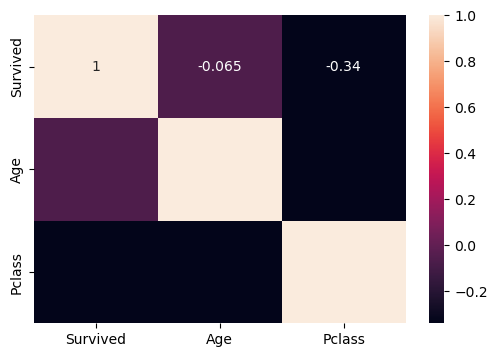

In [18]:
#correlation

plt.figure(figsize = (6,4))
sns.heatmap(df1.corr(), annot=True);

CHECKING THE ANOMALIES

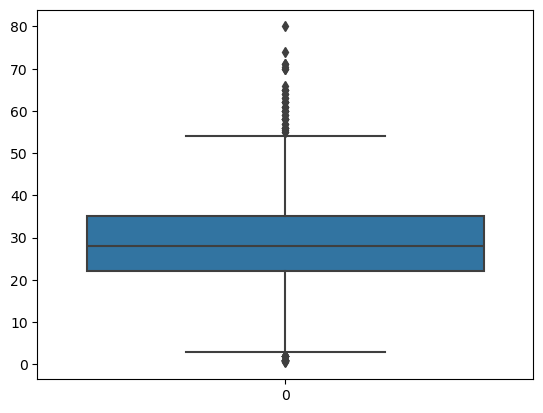

In [19]:
#boxplot

sns.boxplot(df['Age']);

OUTLIER

Using IQR:
- IQR tells how spread the middle values are. it can be used to tell when a value is too far from the middle
- an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile

Step by step:
1. Arrange the data in increasing order
2. Calculate first (Q1) and third (Q3) quartile
3. Find interquartile range (Q3-Q1)
4. Find lower bound (Q1*1.5)
5. Find upper bound (Q3*1.5)

Anything that lies outside of lower & upper bound is an outlier

In [20]:
df_age_notnull = df['Age'][df['Age'].notnull()]

Finding 1st quartile and 3rd quartile

In [21]:
q1, q3= np.percentile(df_age_notnull, [25,75])

print(q1, q3)

22.0 35.0


Find the IQR which is the difference between third and first quartile

In [22]:
iqr = q3 - q1

print(iqr)

13.0


Find lower & upper bound

In [23]:
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

print(lower_bound)
print(upper_bound)

2.5
54.5


In [24]:
#handling outlier

df_age_new = df['Age'][(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]

print(df_age_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 825, dtype: float64
